<a href="https://colab.research.google.com/github/yde43/M1-mini-assignment-/blob/master/assignment_2_M1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 1 

a. Execute a PCA analysis on all ​numerical variables​ in the dataset. Hint: Don't forget to scale them before. Use 4 components. What is the cumulative explained variance ratio?


in order to start analysing the Pokemon data, I fisrt need to import it. 

Then i will start going trough the PCA analysis. 

In [1]:
#to start with i will import the things i am goind to need. 

import pandas as pd
pd.set_option('display.float_format',lambda x: '%.3f'% x)

import numpy as np
!pip3 install seaborn==0.9.0

import seaborn as sns
#i also choose a style for seaborn
sns.set_style('darkgrid')

import matplotlib.pyplot as plt


In [2]:
#now for the importing of the data
poke= pd.read_csv('https://github.com/SDS-AAU/M1-2019/raw/master/data/pokemon.csv')

poke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 11 columns):
Number            800 non-null int64
Name              800 non-null object
Type1             800 non-null object
HitPoints         800 non-null int64
Attack            800 non-null int64
Defense           800 non-null int64
SpecialAttack     800 non-null int64
SpecialDefense    800 non-null int64
Speed             800 non-null int64
Generation        800 non-null int64
Legendary         800 non-null bool
dtypes: bool(1), int64(8), object(2)
memory usage: 63.4+ KB


Since the data seems clear and ready to use i will go straight to the PCA part

This also includes standardardising the data firt 


In [0]:
#inorder to use the data in PCA i first need to use a standardscaler to scale it
#However, since type and name columns are objects i will create a data set with only numerical datasets
poke_data=poke.loc[:,'HitPoints':'Generation']

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

poke_scales = scaler.fit_transform(poke_data)




In [4]:
#just to get an overview over the data i print it out as a dataframe to see that everything is as it should be
pd.DataFrame(poke_scales, columns=poke_data.columns).describe()

,HitPoints,Attack,Defense,SpecialAttack,SpecialDefense,Speed,Generation
count,800.000,800.000,800.000,800.000,800.000,800.000,800.000
mean,-0.000,-0.000,0.000,0.000,-0.000,-0.000,-0.000
std,1.001,1.001,1.001,1.001,1.001,1.001,1.001
min,-2.675,-2.281,-2.209,-1.921,-1.866,-2.179,-1.400
25%,-0.755,-0.740,-0.765,-0.705,-0.788,-0.802,-0.797
50%,-0.167,-0.123,-0.123,-0.239,-0.068,-0.113,-0.195
75%,0.421,0.647,0.518,0.678,0.651,0.748,1.010
max,7.279,3.422,5.011,3.706,5.685,3.847,1.612


In [5]:
#now for the set up of the PCA analysis. i use 4 components since it is recomended in the assignment.
from sklearn.decomposition import PCA

pca=PCA(n_components=4)

#in order to make the pca work, i fit and transform the scaled pokemons
pca_pokes=pca.fit_transform(poke_scales)

#Then i print out the sum of the variances
pca.explained_variance_ratio_.sum()

0.7980734261924607

Now for the next question

b. Perform a cluster analysis (either k-means or hierarchical clustering algorithm) on all numerical variables (scaled & before PCA). Apply the elbow method to determine a “pragmatic” number of clusters.

i will try to answear this trough Kmeans and the elbow method

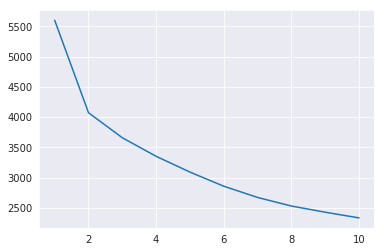

In [6]:
#firt i import the nessesary modules
from sklearn.cluster import KMeans

#and make a plot over the data 
inertia = []
for i in range(1,11):
  k_means = KMeans(n_clusters=i)
  inertia.append(k_means.fit(poke_scales).inertia_)

sns.lineplot(y = inertia, x = range(1,11))

In [7]:
#Now i cluster the data since the elbow is visible at 2 components, i will use 2.

clusterer = KMeans(n_clusters=2)
clusterer.fit(poke_scales)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

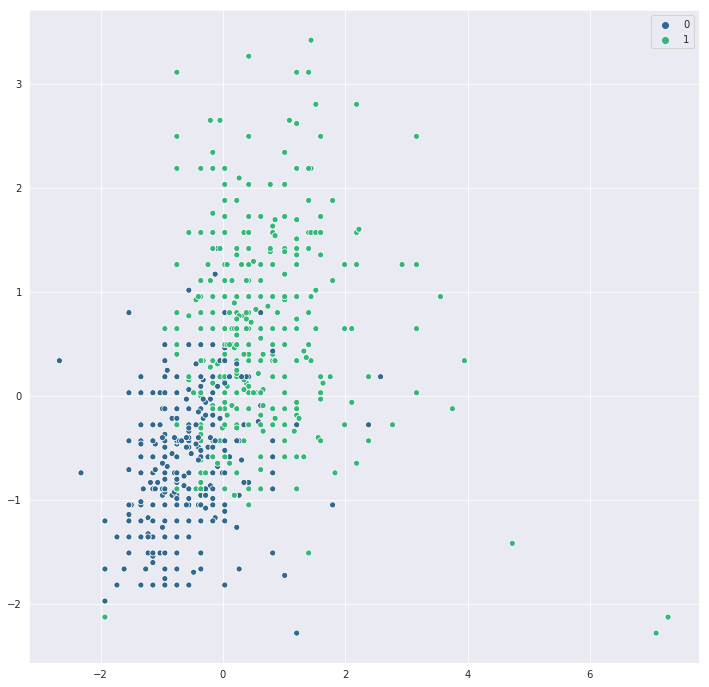

In [8]:
# Now to plot in the points with coloring to get a visual

plt.figure(figsize=(12,12))
g = sns.scatterplot(poke_scales[:,0], poke_scales[:,1], hue=clusterer.labels_,
               legend='full', palette='viridis')

legend = g.get_legend()

c. Visualize the first 2 principal components and color the datapoints by cluster.

in order to make a vizualizastion that show the 2 first principal components i do the following code.

<Figure size 432x288 with 0 Axes>

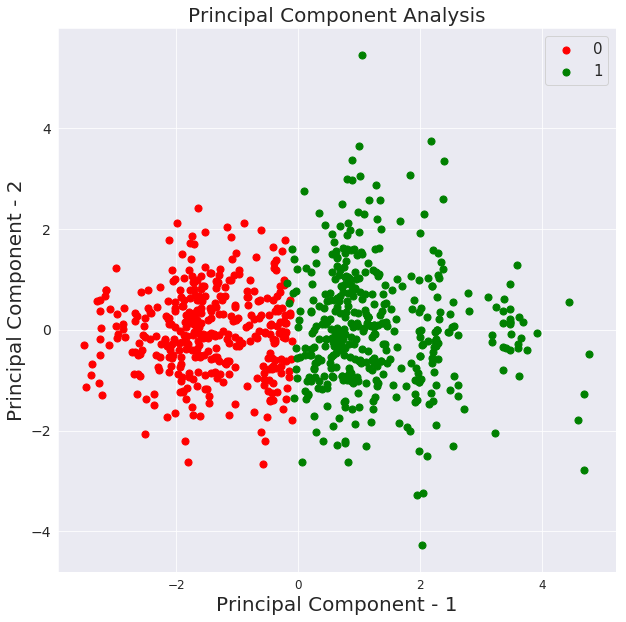

In [9]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis",fontsize=20)
targets = [0, 1]
colors = ['r', 'g']
#Here i make the code go trough the data, and assign colors to the data points. 
for target, color in zip(targets,colors):
    indicesToKeep = clusterer.labels_ == target
    plt.scatter(pca_pokes[indicesToKeep, 0]
               , pca_pokes[indicesToKeep, 1], c = color, s = 50)

plt.legend(targets,prop={'size': 15})

d. Inspect the distribution of the variable “Type1” across clusters. Does the
algorithm separate the different types of pokemon?



In [10]:
pd.crosstab(poke.Type1,clusterer.labels_,colnames=['Clusters'])

Clusters,0,1
Type1,,
Bug,43,26
Dark,14,17
Dragon,9,23
Electric,18,26
Fairy,9,8
Fighting,12,15
Fire,23,29
Flying,1,3
Ghost,13,19


By using crosstab it becomes clear that the clusteres does not seperate different types.

# Task 2

Your task will be to predict the variable “legendary”, indicating if the pokemon is a legendary one or not.

a. Perform necessary ML preprocessing of your data if deemed necessary.

In [0]:
#First Type1 gets transformed into dummy variables in order to ease sorting.
Type_dummy=pd.get_dummies(poke.Type1,drop_first=True)

In [12]:
#Then i sort the data into X, wich is the poke data and y wich is the legendary column

X = pd.concat([poke.loc[:,'HitPoints':'Generation'],Type_dummy], axis=1, sort=False)
print(X.head())

y = poke.Legendary
print(y.head())

   HitPoints  Attack  Defense  SpecialAttack  ...  Psychic  Rock  Steel  Water
0         45      49       49             65  ...        0     0      0      0
1         60      62       63             80  ...        0     0      0      0
2         80      82       83            100  ...        0     0      0      0
3         80     100      123            122  ...        0     0      0      0
4         39      52       43             60  ...        0     0      0      0

[5 rows x 24 columns]
0    False
1    False
2    False
3    False
4    False
Name: Legendary, dtype: bool


Then the y data gets made numerical instead of boolean in order to be used in the test sets later

In [0]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y_enc = encoder.fit_transform(y)

In [14]:
#fitting and scaling X, and lastly checking the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pd.DataFrame(X_scaled, columns=X.columns).describe()

,HitPoints,Attack,Defense,SpecialAttack,SpecialDefense,Speed,Generation,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water
count,800.000,800.000,800.000,800.000,800.000,800.000,800.000,800.000,800.000,800.000,800.000,800.000,800.000,800.000,800.000,800.000,800.000,800.000,800.000,800.000,800.000,800.000,800.000,800.000
mean,-0.000,-0.000,0.000,0.000,-0.000,-0.000,-0.000,0.000,0.000,-0.000,0.000,-0.000,-0.000,0.000,0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,0.000,-0.000,-0.000
std,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001
min,-2.675,-2.281,-2.209,-1.921,-1.866,-2.179,-1.400,-0.201,-0.204,-0.241,-0.147,-0.187,-0.264,-0.071,-0.204,-0.310,-0.204,-0.176,-0.374,-0.190,-0.277,-0.241,-0.187,-0.403
25%,-0.755,-0.740,-0.765,-0.705,-0.788,-0.802,-0.797,-0.201,-0.204,-0.241,-0.147,-0.187,-0.264,-0.071,-0.204,-0.310,-0.204,-0.176,-0.374,-0.190,-0.277,-0.241,-0.187,-0.403
50%,-0.167,-0.123,-0.123,-0.239,-0.068,-0.113,-0.195,-0.201,-0.204,-0.241,-0.147,-0.187,-0.264,-0.071,-0.204,-0.310,-0.204,-0.176,-0.374,-0.190,-0.277,-0.241,-0.187,-0.403
75%,0.421,0.647,0.518,0.678,0.651,0.748,1.010,-0.201,-0.204,-0.241,-0.147,-0.187,-0.264,-0.071,-0.204,-0.310,-0.204,-0.176,-0.374,-0.190,-0.277,-0.241,-0.187,-0.403
max,7.279,3.422,5.011,3.706,5.685,3.847,1.612,4.981,4.899,4.145,6.787,5.351,3.793,14.107,4.899,3.229,4.899,5.686,2.676,5.251,3.610,4.145,5.351,2.478


b. Split the data in a training (75%) and test (25%) dataset.

in order to split the data, i will use the train_test_split function

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_enc, test_size = 0.25, random_state = 42)



c. Define a n-fold cross-validation workflow for your model testing.

In [0]:
from sklearn.model_selection import cross_val_score
# later the following code will be used in the testing scores = cross_val_score(model, X_train, y_train, cv = 5)

d. Fit three separate models on your training data, where you predict the
“legendary” variable. Use a 1. Logistic regression, 2. Decision tree, and 3.
another algorithm of choice to do so.

First i will do the logisticregression

In [17]:
from sklearn.linear_model import LogisticRegression
LogReg = LogisticRegression(solver='lbfgs') #Specified solver to silence a warning.
LogReg.fit(X_train, y_train)
print(np.mean(cross_val_score(LogReg, X_train, y_train, cv = 5)))

0.9483445609648818


In [18]:
#Now for the Decision tree
from sklearn.tree import DecisionTreeClassifier
Tree = DecisionTreeClassifier()
Tree.fit(X_train, y_train)
print(np.mean(cross_val_score(Tree, X_train, y_train, cv = 5)))

0.9116482626108295


In [19]:
#The last model that gets used is RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

Forest = RandomForestClassifier()

Forest.fit(X_train,y_train)
print(np.mean(cross_val_score(Forest, X_train, y_train, cv = 5)))

0.9366771998055421


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


when examining the result of the three tests, it can be seen, that the logisticregression gave the best result, followed by the randomForest and last the Decision Tree

e. Use the fitted models to predict the “legendary” variable in your test data.



In [0]:
#Here the predictions made gets saved for later use in the visualizations
y_pred_LogReg = LogReg.predict(X_test)
y_pred_Tree = Tree.predict(X_test)
y_pred_For = Forest.predict(X_test)

f. Evaluate the performance of these 3 models by comparing the predicted and the true values of “legendary” in the test data. To do so, also create a confusion matrix.

when using this matrix i will print the true positive rate, since there is a lot more non-legendary than legendary

In [21]:
!pip install -U mlxtend

from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix


     |████████████████████████████████| 1.3MB 4.9MB/s 
  Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


True positive rate:0.8461538461538461


(<Figure size 432x288 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fef1cd769e8>)

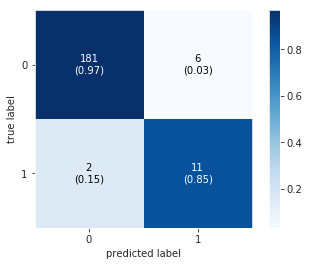

In [22]:
#For the LogisticRegression
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_LogReg).ravel()
print('True positive rate:{}' .format(tp/y_test.sum()))
plot_confusion_matrix(conf_mat=confusion_matrix(y_test, y_pred_LogReg),
                                colorbar=True,
                                show_absolute=True,
                                show_normed=True)

True positive rate:0.6923076923076923


(<Figure size 432x288 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fef1cd02358>)

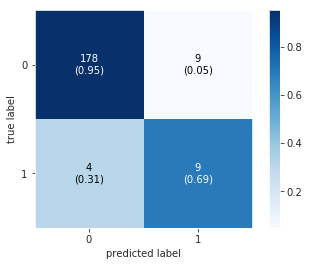

In [23]:
#For the DesicisionTree
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_Tree).ravel()
print('True positive rate:{}' .format(tp/y_test.sum()))
plot_confusion_matrix(conf_mat=confusion_matrix(y_test, y_pred_Tree),
                                colorbar=True,
                                show_absolute=True,
                                show_normed=True)

True positive rate:0.6153846153846154


(<Figure size 432x288 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fef1d125c50>)

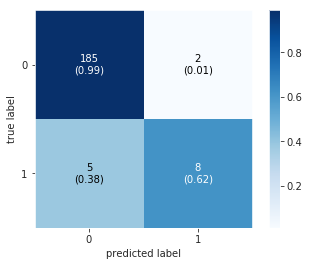

In [24]:
#For the randomforest
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_For).ravel()
print('True positive rate:{}' .format(tp/y_test.sum()))
plot_confusion_matrix(conf_mat=confusion_matrix(y_test, y_pred_For),
                                colorbar=True,
                                show_absolute=True,
                                show_normed=True)

overall it appears that the models are pretty decent, at predicting wheter or not a pokemon will be legendary. however, it also seems, that the Randomforest model, has more problems predicting than the others. 